### EDA Objective
* Check dataset's cleanliness
* Plot the data to identify distributions and/or outliers
* Prepare dataset to perform causal analysis

#### Column descriptions:
* temp (confouder): temperature registered in celsius
* weekday (confounder): from 1 (sunday) to 7 (saturday)
* cost (confounder): cost of production from ice cream in reais
* price (treatment: continuous): price sold in reais
* sales (outcome: continuous): sales amount in units

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#config
sns.set_theme(style="ticks")

In [32]:
data_path = r'..\data\ice_cream_sales.csv'

df = pd.read_csv(data_path)
df.head()

,temp,weekday,cost,price,sales
0,17.3,6,1.5,5.6,173
1,25.4,3,0.3,4.9,196
2,23.3,5,1.5,7.6,207
3,26.9,1,0.3,5.3,241
4,20.2,1,1.0,7.2,227


In [33]:
#dataframe overview
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   temp     10000 non-null  float64
 1   weekday  10000 non-null  int64  
 2   cost     10000 non-null  float64
 3   price    10000 non-null  float64
 4   sales    10000 non-null  int64  
dtypes: float64(3), int64(2)
memory usage: 390.8 KB


In [34]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
temp,10000.0,24.01423,3.972403,10.1,21.3,24.0,26.7,37.4
weekday,10000.0,3.98240,2.017696,1.0,2.0,4.0,6.0,7.0
cost,10000.0,0.81860,0.461384,0.3,0.5,0.5,1.0,1.5
price,10000.0,6.12942,1.193519,1.9,5.3,6.1,6.9,10.6
sales,10000.0,200.50330,19.422964,140.0,187.0,197.0,213.0,258.0


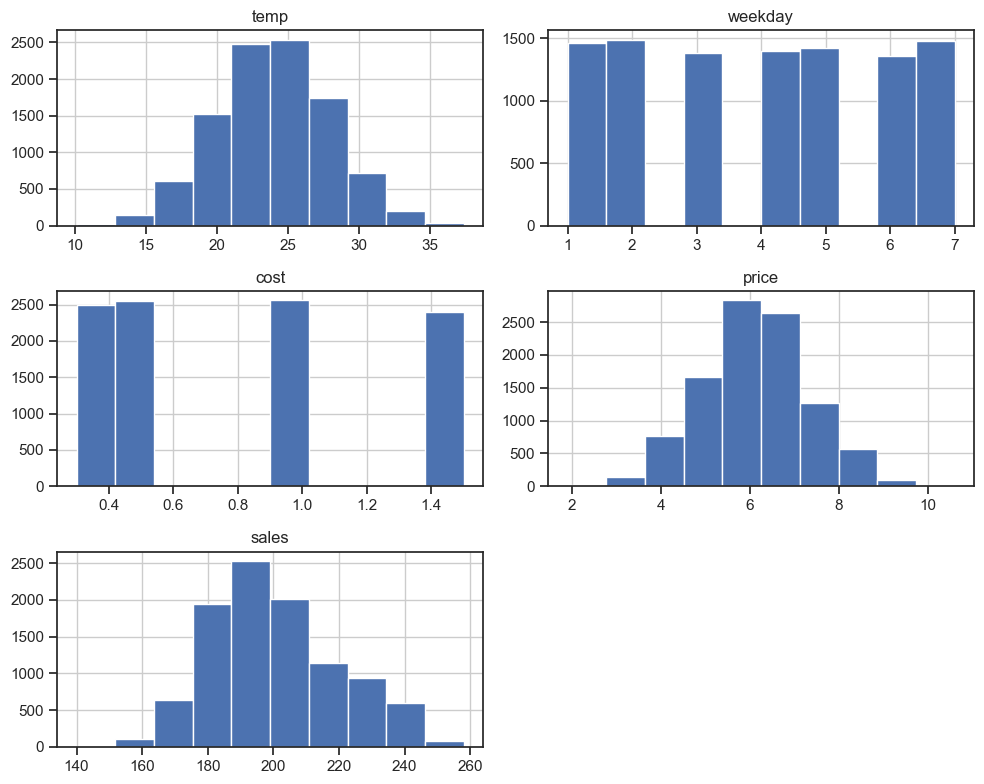

In [40]:
df.hist(figsize=(10, 8))
plt.tight_layout()

* average price and sales
* sales per temperature (is there more sales on hotter days?) and weekday (is there more sales on weekends?)
* does temperature influence price? or cost influence price?

In [36]:
#average price and sales
df[['price', 'sales']].mean()

price      6.12942
sales    200.50330
dtype: float64

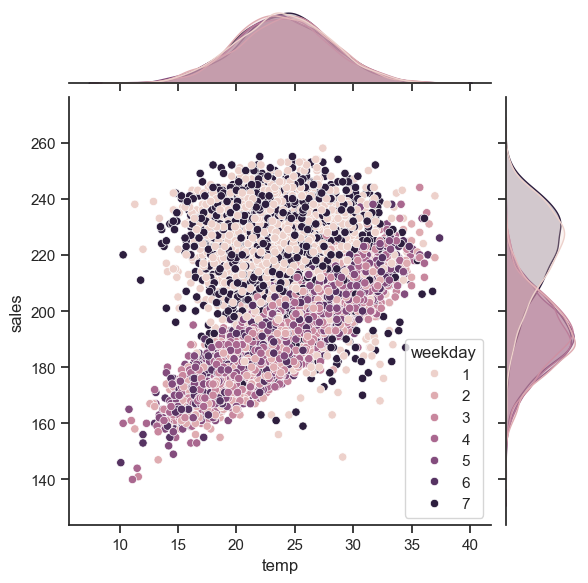

In [42]:
#sales per temperature
sns.jointplot(
    data=df,
    x='temp',
    y='sales',
    hue='weekday'
)

There seems to be a positive correlation between temperature and sales, but only on weekdays. At weekends, sales seems random.

Text(0.5, 0.5, 'mean: 221.58')

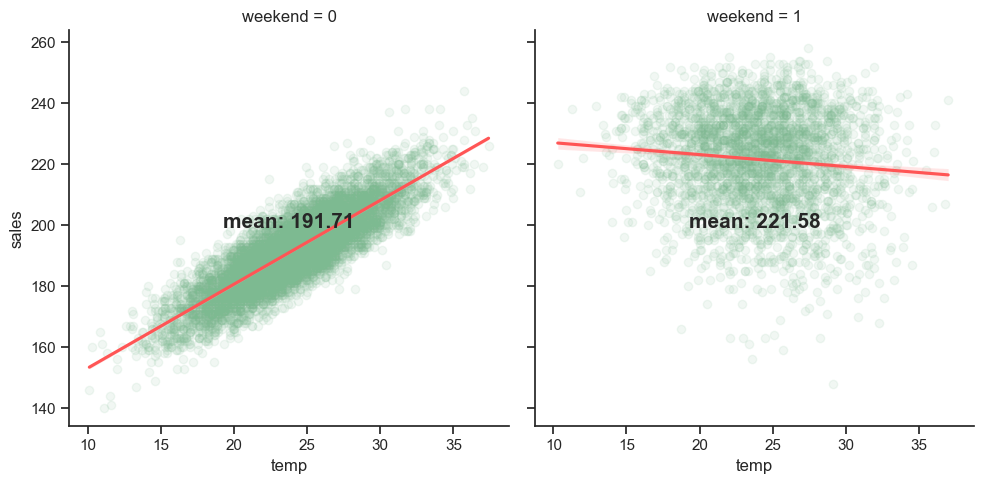

In [90]:
sns.set_palette('crest')

df['weekend'] = np.select([df['weekday'] == 1, df['weekday'] == 7], [1, 1], 0)
g = sns.lmplot(
    data=df,
    x='temp',
    y='sales',
    col='weekend',
    scatter_kws=dict(alpha=0.1),
    line_kws=dict(color='#FF5555')
)

w0, w1 = g.axes[0]
w0.text(0.5, 0.5, f'mean: {df.query('weekend==0')['sales'].mean():.2f}', size=15, transform=w0.transAxes, horizontalalignment='center', fontweight='bold')
w1.text(0.5, 0.5, f'mean: {df.query('weekend==1')['sales'].mean():.2f}', size=15, transform=w1.transAxes, horizontalalignment='center', fontweight='bold')

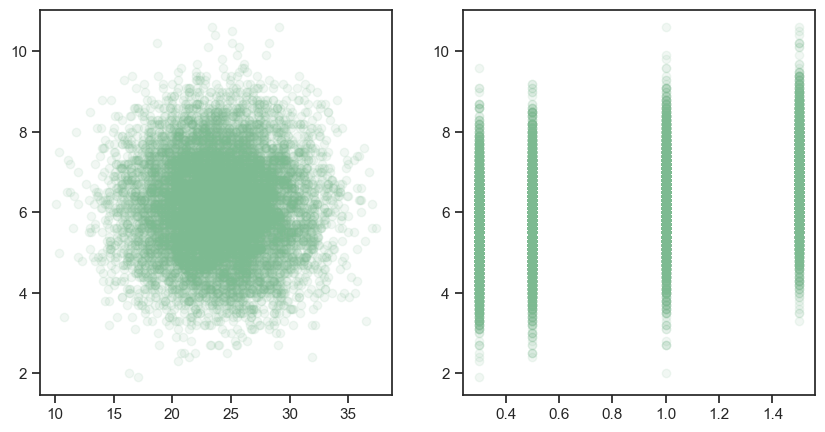

In [100]:
#influence of temp on price and cost on price
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].scatter(data=df, x='temp', y='price', alpha=0.1, edgecolor=None)
axs[1].scatter(data=df, x='cost', y='price', alpha=0.1, edgecolor=None)

There seems to be no correlation with temp and price or cost and price